<a href="https://colab.research.google.com/github/OksIvanchik/Python_for_CL/blob/main/CL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

In [30]:
#2022
df = pd.read_csv('bbc_17_23.csv')
#print(df)

df['pubDate'] = pd.to_datetime(df['pubDate']) #convert every string in pubDate column to datetime value 
#print(df['pubDate'])

df['Year'] = df['pubDate'].dt.date.apply(lambda x: x.year) #apply lambda function to every string in pubDate column to extract year and assign it to the column Year

df.groupby(by = 'Year').count() #group by year and count the number of records

,title,pubDate,guid,link,description
Year,,,,,
2017,1,1,1,1,1
2019,1,1,1,1,1
2021,4,4,4,4,4
2022,12298,12298,12298,12298,12298
2023,2349,2349,2349,2349,2349


In [26]:
#2010
df2 = pd.read_json('bbc_10_12.json', orient = 'records')
#print(df2)

df2['news_post_date'] = pd.to_datetime(df2['news_post_date'])
#print(df2['news_post_date'])

df2['Year'] = df2['news_post_date'].dt.date.apply(lambda x: x.year)
#print(df2['Year'])

df2.groupby(by='Year').count()


,tags,title,news_post_date,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at
Year,,,,,,,,,,,,,
2010,15819,15819,15819,15819,15819,15819,15819,15819,15819,15819,15819,15819,15819
2012,6,6,6,6,6,6,6,6,6,6,6,6,6


In [176]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [174]:
lines_22 = df2['title'][df2['Year'] == 2010].values
russia_22 = []

# get all lines having word russia/russians
for line in lines_22:
  if 'russia' in line.lower():
    russia_22 += [line.strip('?:- ') for line in line.split()]

print(len(russia_22))

# remove stop words
clean_words = []
for word in russia_22:
  word = word.lower()
  if ((word not in STOP_WORDS) and ('russia' not in word) and len(word) and ('maps' not in word)):
    clean_words.append(word)

# keep only nouns
nlp = spacy.load("en_core_web_sm")
nouns = [word for word in clean_words if nlp(word)[0].pos_ == 'NOUN']

# count frequency
pd.Series(nouns).value_counts().head(10)

697


spy        12
belarus     8
gas         7
spies       6
oil         4
pletnev     4
ship        4
court       3
profit      3
cargo       3
dtype: int64

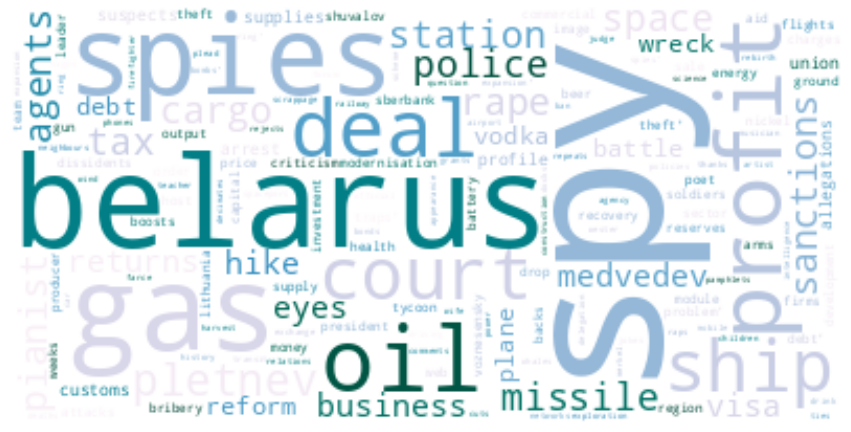

In [175]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(nouns)
wordcloud = WordCloud(background_color="white", colormap='PuBuGn').generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()